# **Setting & Introduction**

### **1. Github 연동**

In [1]:
""" github 연동 """
!git clone https://github.com/SungsuKim/2023_LG_ES_SSL_1.git # colab 사용시

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

### **2. 조교소개**

In [2]:
# !pip install IPython
from IPython.display import Image

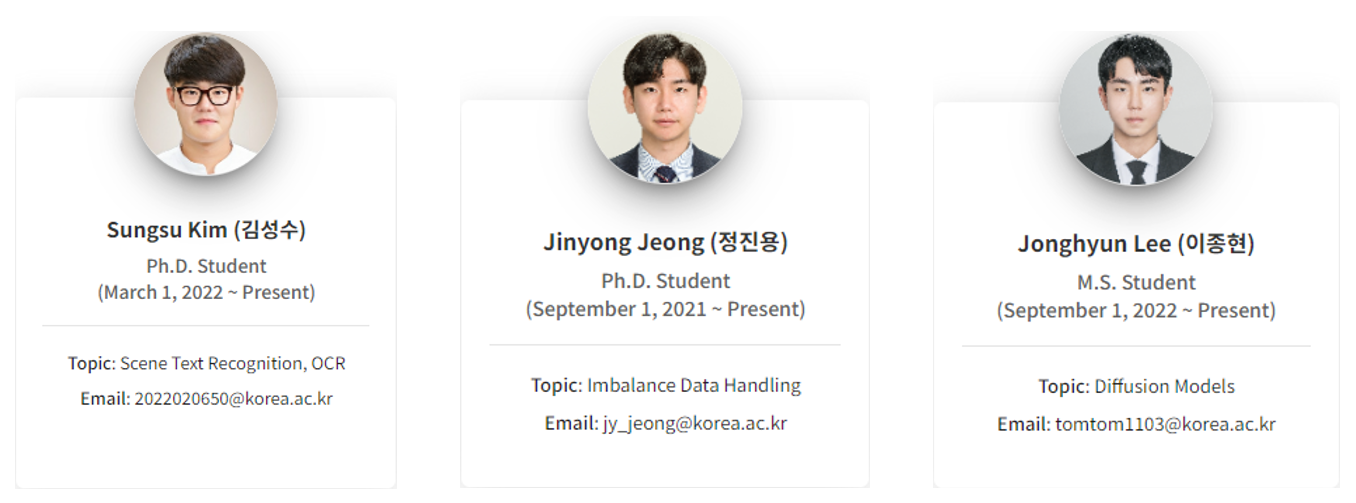

In [3]:
""" 설명 장표 불러오기 """
Image('image/image1.PNG') ### 로컬 사용시
# Image('/content/2023_LG_ES_SSL_1/image/image1.PNG') ### colab 사용시

### **3. About Jupyter Notebook**

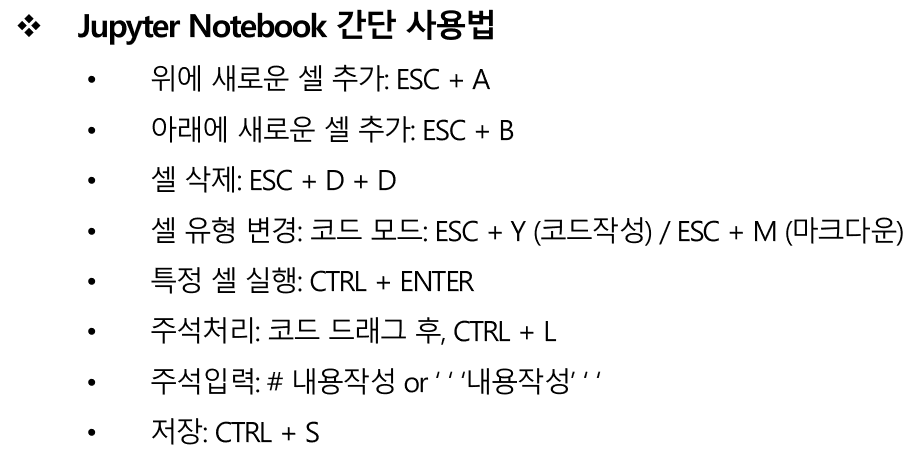

In [4]:
""" 설명 장표 불러오기 """
Image('image/image2.PNG') ### 로컬 사용시
# Image('/content/2023_LG_ES_SSL_1/image/image2.PNG') ### colab 사용시

### **4. 강의목차**

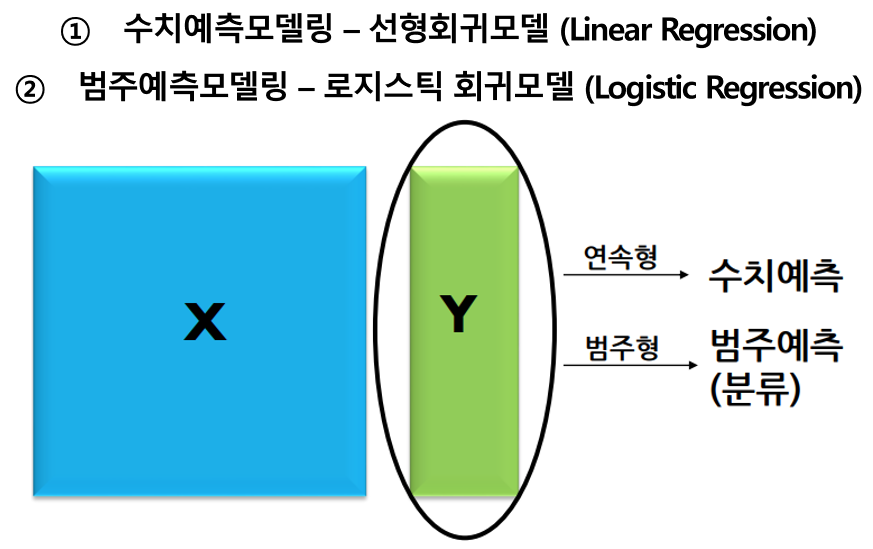

In [5]:
""" 설명 장표 불러오기 """
Image('image/image3.PNG') ### 로컬 사용시
# Image('/content/2023_LG_ES_SSL_1/image/image3.PNG') ### colab 사용시

# **실습**

### **0. 필요 패키지 불러오기**

In [6]:
"""
패키지 불러오기

style1: import warnings
 - warnings 패키지를 불러온다.
 
style2: import pandas as pd
 - pandas 패키지를 불러온다. 또한 추후 pandas를 pd로 줄여서 활용하겠다.
 
style3: from sklearn.linear_model import LinearRegression
 - sklearn.linear_model에서 LinearRegression 함수를 불러온다.
"""


""" 데이터 전처리 패키지 """
import numpy as np
import pandas as pd

""" 기계학습 모델 구축 및 평가 패키지 """
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

""" 데이터 시각화 패키지 """
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

""" 경고 숨기기 """
import warnings
warnings.filterwarnings(action='ignore')

### **1. 데이터 핸들링 및 탐색적 데이터 분석**
 - 분석데이터: Boston Housing Data (https://archive.ics.uci.edu/ml/datasets.php)

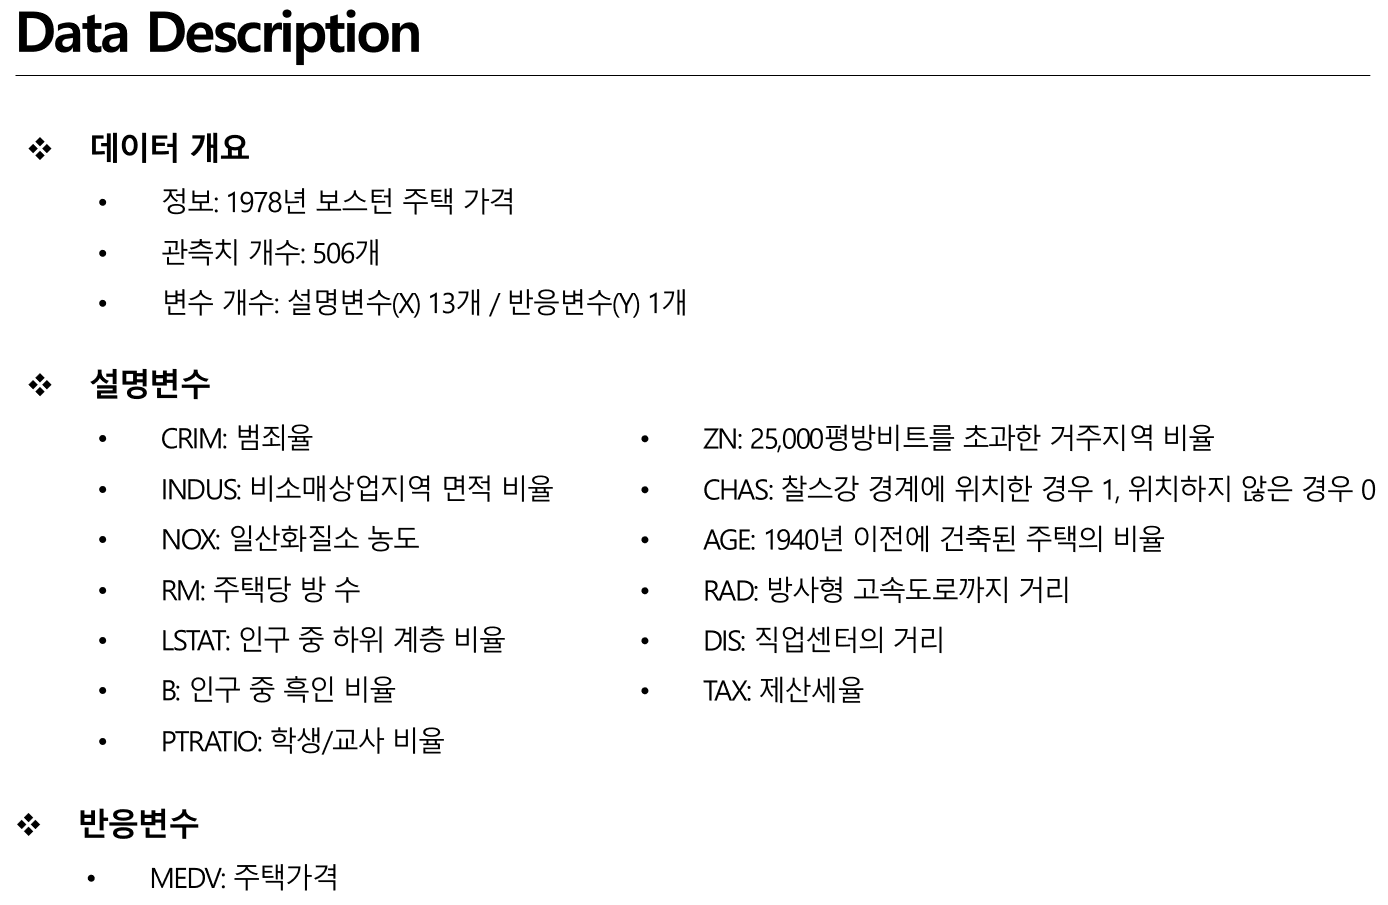

In [7]:
""" 설명 장표 불러오기 """
Image('image/image4.PNG') ### 로컬 사용시
# Image('/content/2023_LG_ES_SSL_1/image/image4.PNG') ### colab 사용시

#### **1-1. 데이터 불러오기 및 개요 파악**

In [8]:
""" 데이터 불러오기 """
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
""" 데이터 개요 확인 """
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
""" X변수 실제값 확인 """
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
""" X변수명 확인"""
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
""" X변수 크기 확인"""
boston.data.shape

(506, 13)

In [13]:
""" Y변수 실제값 확인 """
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
""" Y변수 실제값 확인 """
boston.target.shape

(506,)

In [15]:
""" X, Y 데이터프레임화 """
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [16]:
""" X값 일부 확인 """
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
""" y값 일부 확인 """
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### **1-2. 탐색적 데이터 분석**

In [18]:
""" X와 Y를 Index에 맞게 병합 """
data = pd.concat([X, y], axis=1) ### axis=0: 행단위 병합 / axis=1: 열단위 병합
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [19]:
""" 데이터 결측치 여부 및 변수 타입 확인 """
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
""" 각 변수별 통계량 확인 """
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


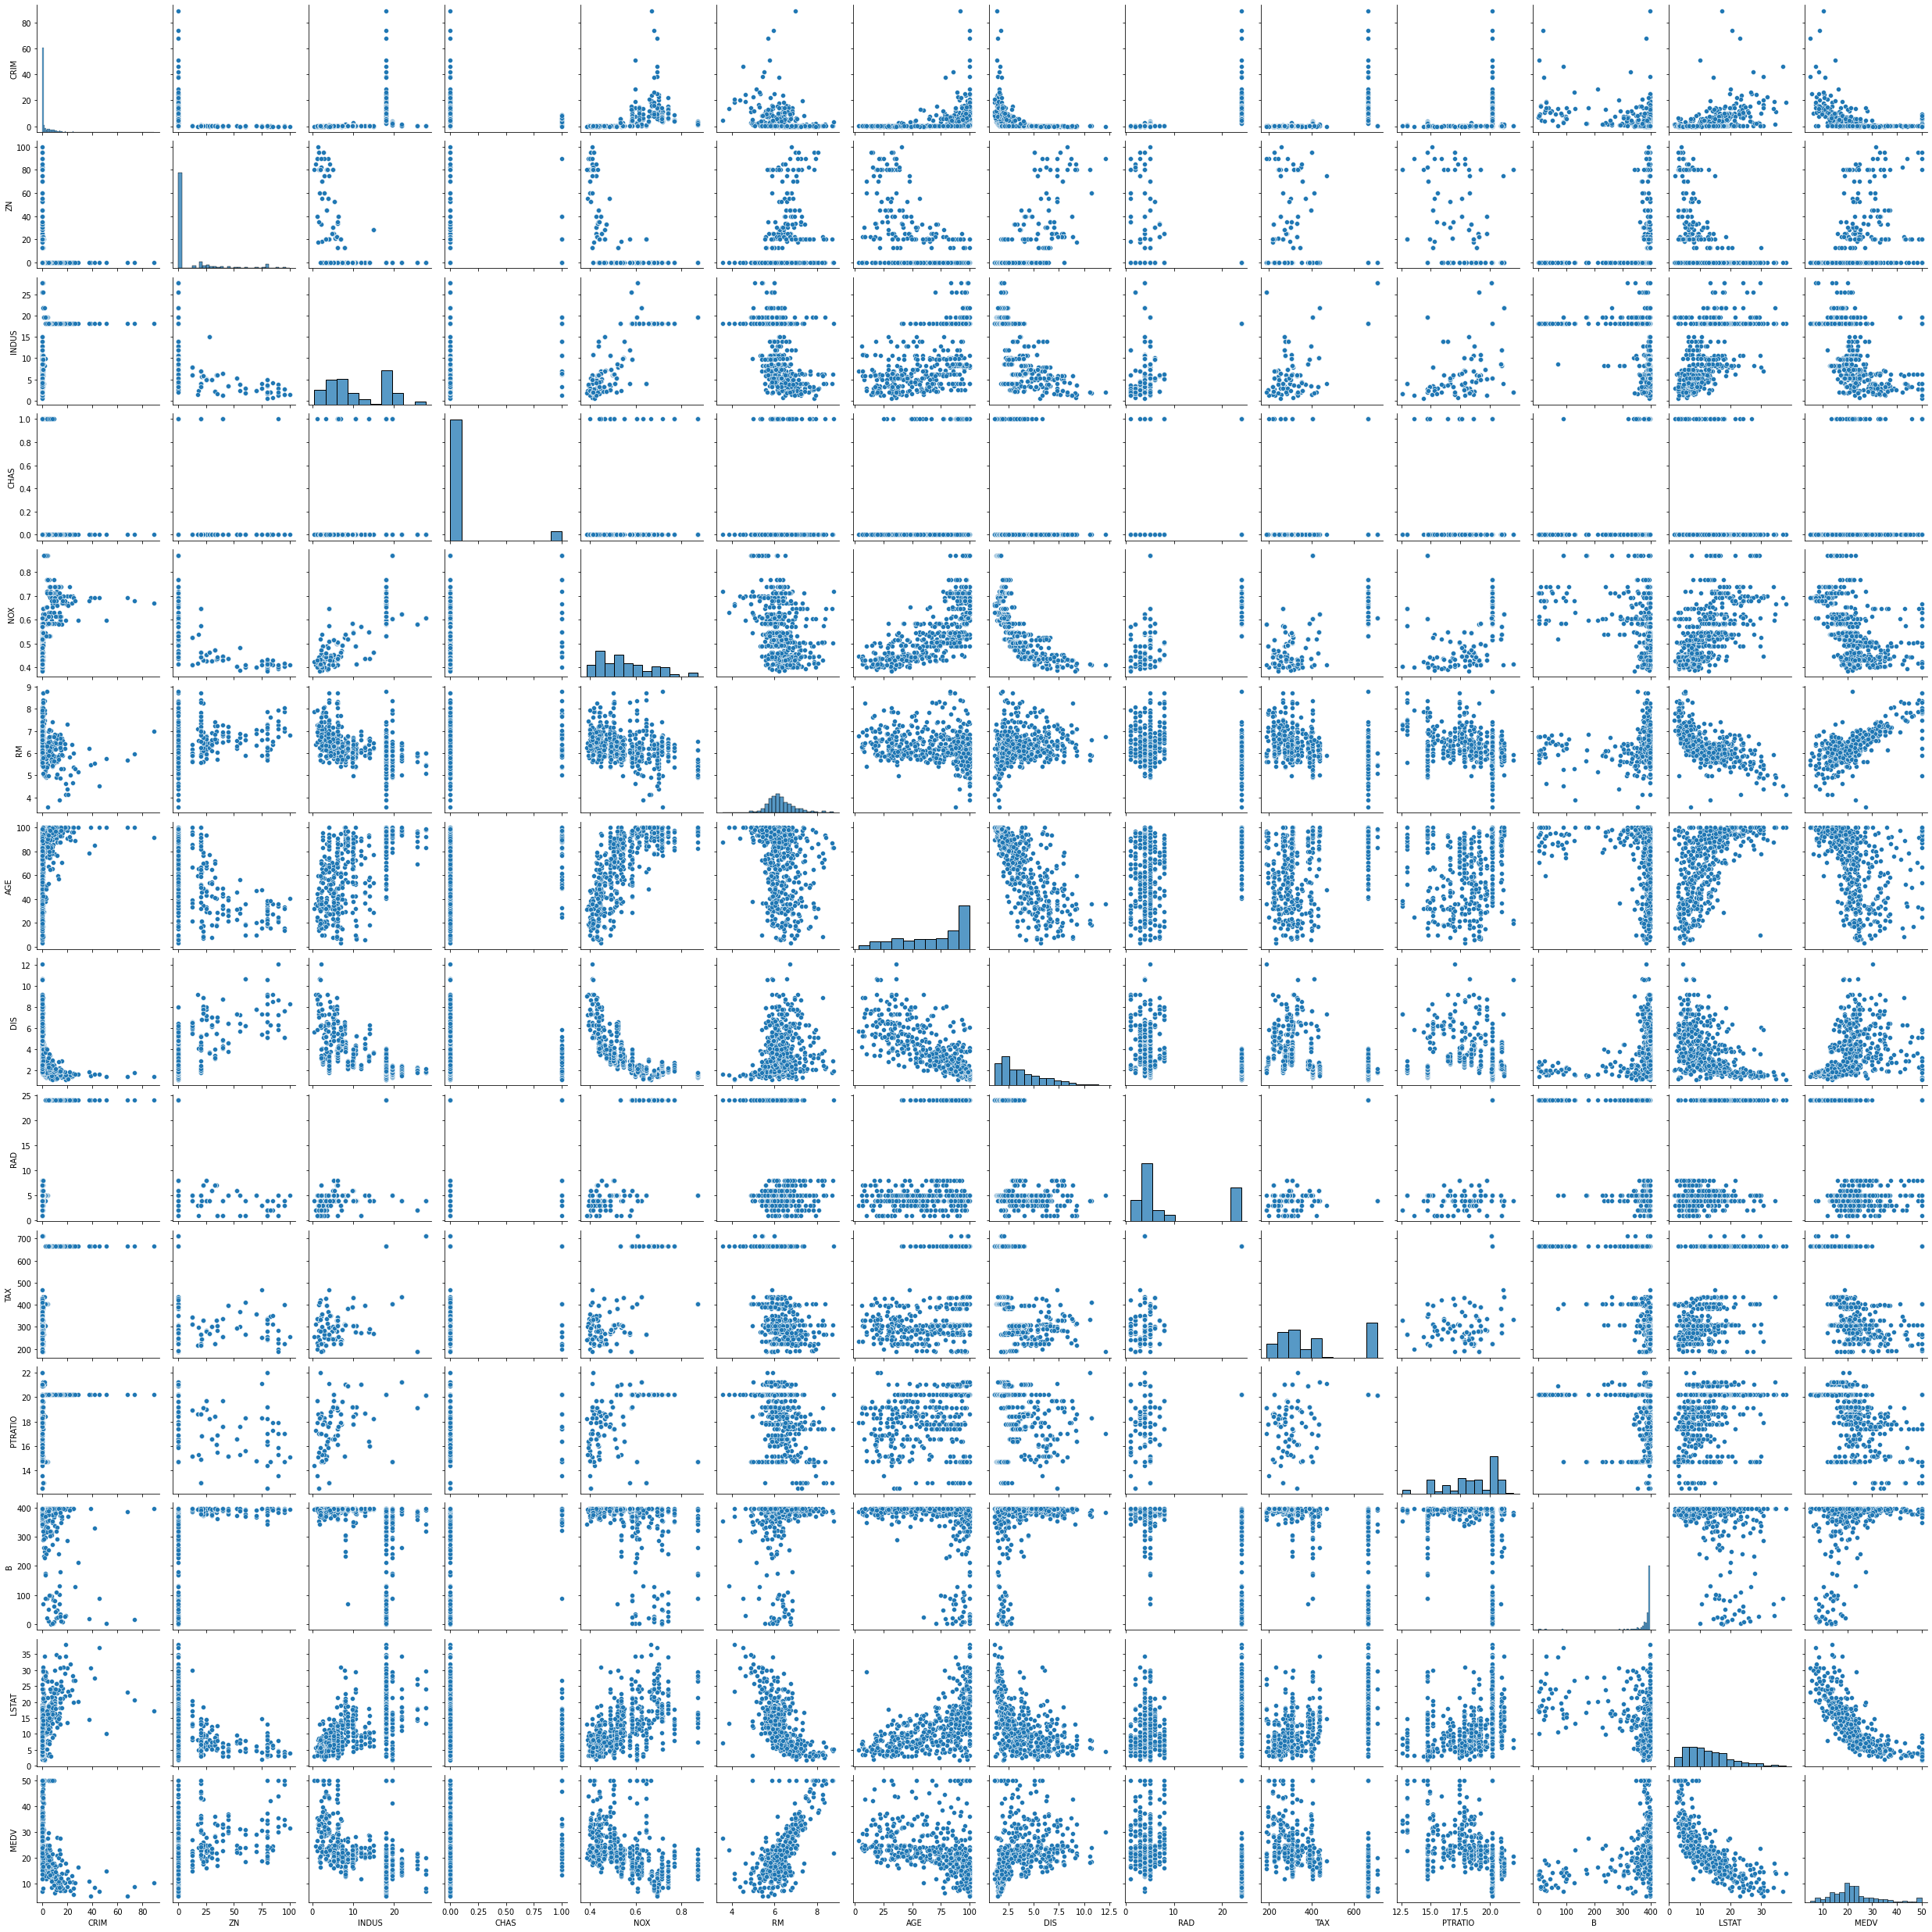

In [21]:
""" 각 변수 간 관계성 시각화 (pairplot) """

"""
pairplot 내 정보
 1) 산점도: 각 변수 간 관계성 파악 (비대각성분)
 2) 히스토그램: 각 변수 내 분포 파악 (대각성분)
"""

sns.pairplot(data)
plt.show()

<Figure size 720x720 with 0 Axes>

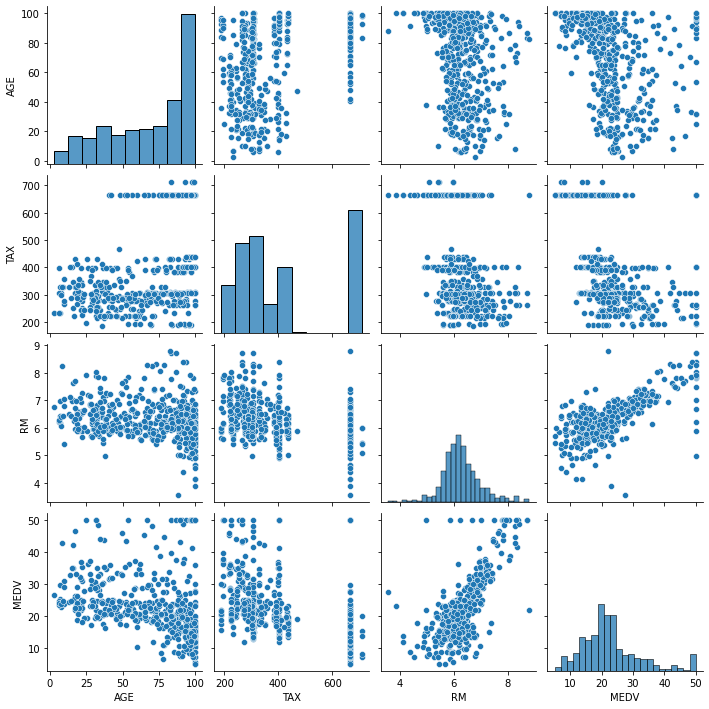

In [22]:
""" 특정 변수 간 관계성 시각화 (pairplot) """
plt.figure(figsize=(10, 10)) ### 이미지 크기 설정
sns.pairplot(data[['AGE', 'TAX', 'RM', 'MEDV']]) ### 특정변수 필터링
plt.show()

In [23]:
""" 변수 별 상관관계 확인 """
data.corr() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


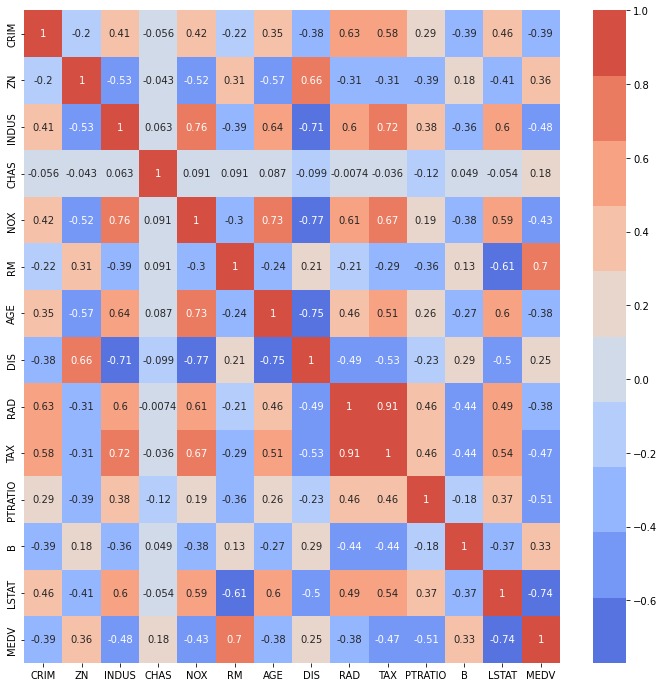

In [24]:
""" 상관관계 시각화 """
plt.figure(figsize=(12, 12))
sns.heatmap(
    data.corr(), ### 히트맵을 그릴 데이터 정의
    cmap=sns.color_palette("coolwarm", 10), ### 팔레트 색깔 설정
    annot=data.corr()
    ) ### 히트맵 내 값 표시
plt.show()

### **2. 데이터 분할**

In [25]:
""" 학습데이터와 평가데이터 분할 """

"""
학습데이터(80%)와 평가데이터(20%)를 구분
 - test_size: 분할 비율 설정
 - random_state: 랜덤성 제어
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=2021)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [26]:
""" X변수들의 학습데이터 형태 확인 """
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
284,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41


In [27]:
""" Y변수들의 학습데이터 형태 확인 """
y_train.head()

,MEDV
28,18.4
498,21.2
284,32.2
414,7.0
123,17.3


### **3. 모델링**
 - statsmodels 패키지의 OLS를 사용하여 선형회귀분석 수행
 
 
 * OLS(Ordinary Least Squares): 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β0, β1, β2 ...) 구하는 방법

#### **3-1. 모델 학습 (파라미터 도출)**

In [28]:
""" 회귀분석의 상수항(β0) 추가 """
X_train = sm.add_constant(X_train)
X_train.head() 

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
28,1.0,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80
498,1.0,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
284,1.0,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85
414,1.0,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
123,1.0,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41


In [29]:
""" 파라미터(β0, β1, β2 .. ) 연산 """
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

#### **3-2. 선형회귀 모델의 가정 충족여부 확인**

In [30]:
""" 오차 값 확인 """
model_residuals = model_trained.resid
model_residuals

28     -1.369709
498    -0.059797
284     0.765858
414    11.983011
123     1.801067
         ...    
109    -0.579809
128    -1.021033
57     -1.897026
341     2.448366
116    -2.177192
Length: 404, dtype: float64

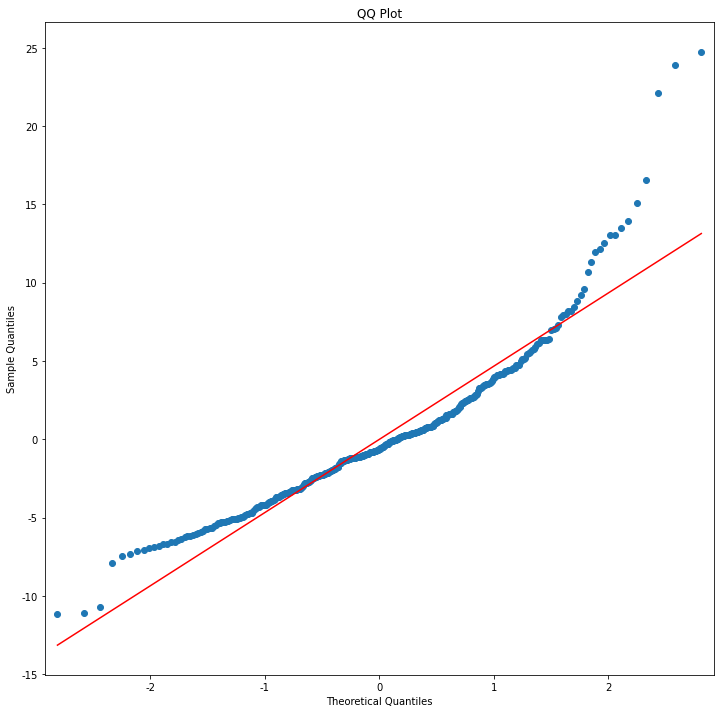

In [31]:
""" 오차의 정규성 확인 """

"""
QQ-plot: 실제 오차 값(Y축) / 실제 오차 값들의 표준 정규화 값 (X축)
y=x 그래프와 유사할수록 정규성을 띈다고 할 수 있다.
"""

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

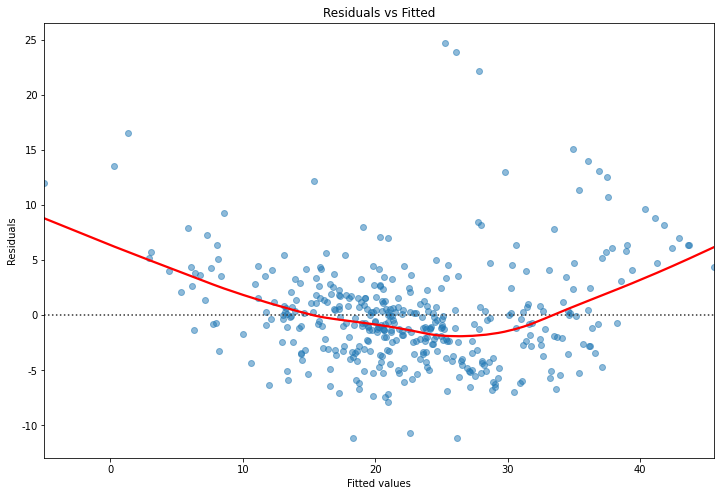

In [32]:
""" 오차의 등분산성 확인 """

"""
모델이 예측한 값 (X축) / 해당 예측값에 대한 오차 (Y축)
 - 특정 패턴을 찾아볼 수 없고, 무작위한 특징을 보인다면 등분산성 입증 가능
"""

model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(x=model_fitted_y, 
              y=y_train, 
              data=X_train, 
              lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

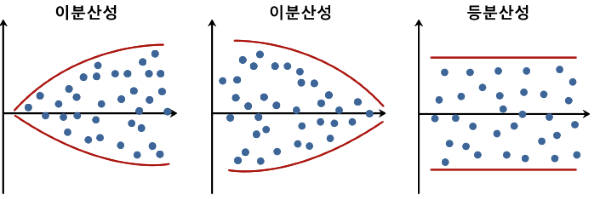

In [33]:
""" 설명 장표 불러오기 """
Image('image/image5.PNG') ### 로컬 사용시
# Image('/content/2023_LG_ES_SSL_1/image/image5.PNG') ### colab 사용시

#### **3-3. 모델 결과해석**

In [34]:
""" 모델 결과 해석 """

"""
 1) R-squared (R2 Score): 모델의 성능 지표 중 1개
 2) coef (회귀계수): 각 변수들의 회귀 계수 (=X가 한단위 증가할 때 Y의 변화량)
 3) P>[t] (p-value): 0.05(유의수준) 이하일 때 변수가 유의미
"""

print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.02e-110
Time:                        20:09:55   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

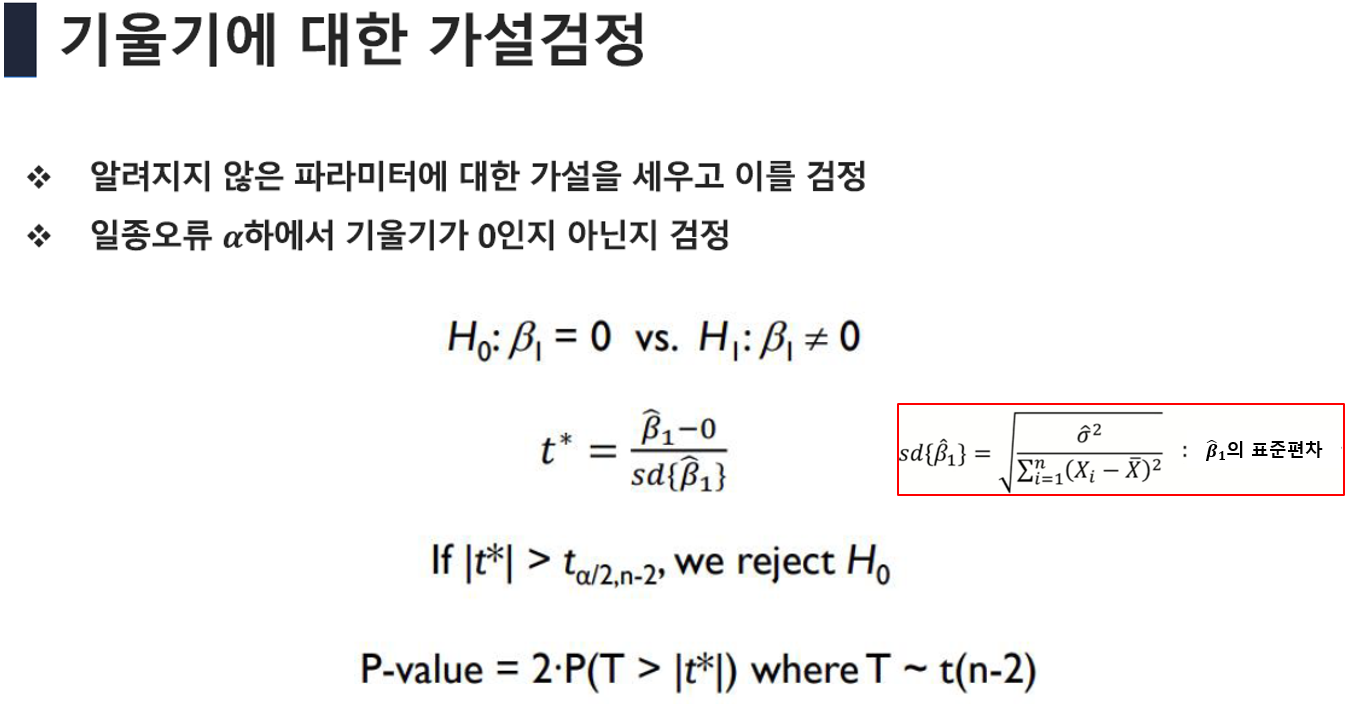

In [35]:
""" 설명 장표 불러오기 """
Image('image/image6.PNG') ### 로컬 사용시
# Image('/content/2023_LG_ES_SSL_1/image/image6.PNG') ### colab 사용시

In [36]:
""" 유의미하지 않은 변수 제거 후, 다시 모델링 """

"""
유의미하지 않은 변수 == p-value가 높은 변수 (INDUS, AGE)
 - INDUS: 비소매상업지역 면적비율
 - AGE: 1940년 이전에 건축된 주택의 비율
"""

X_train = X_train.drop(['INDUS', 'AGE'], axis=1)
model = sm.OLS(y_train, X_train)
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.19e-112
Time:                        20:09:55   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

#### **3-4. 예측 및 평가**

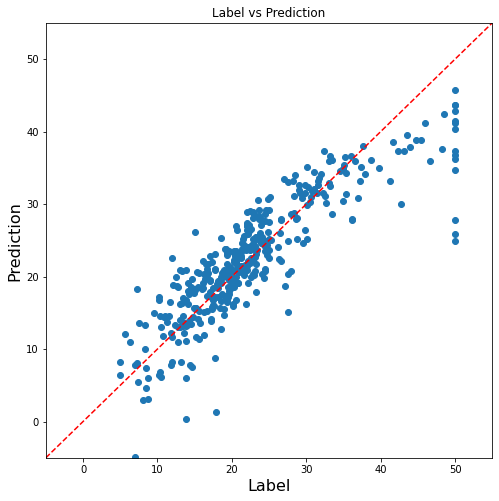

In [37]:
""" 예측: 기존에 학습했던 데이터로 반응변수값 예측 """

"""
X축: 실제 train_y값
Y축: train_x에 대한 예측값
 - y=x위에 있을수록 잘 예측한 것으로 해석 가능
"""

y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('Label vs Prediction')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 55], [-5, 55], ls="--", c='red')
plt.xlabel('Label', size=16)
plt.ylabel('Prediction', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

In [38]:
""" 평가: 이전에 학습하지 않았던 데이터(test_y)로 모델 성능 평가 """

"""
train 데이터에 맞게 test 데이터도 전처리 수행
 - 상수항 추가
 - 유의미하지 않은 변수 제거
"""

X_test = sm.add_constant(X_test)
X_test = X_test.drop(['INDUS', 'AGE'], axis=1)
X_test.head()

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
210,1.0,0.17446,0.0,1.0,0.489,5.960,3.8771,4.0,277.0,18.6,393.25,17.27
24,1.0,0.75026,0.0,0.0,0.538,5.924,4.3996,4.0,307.0,21.0,394.33,16.30
36,1.0,0.09744,0.0,0.0,0.499,5.841,3.3779,5.0,279.0,19.2,377.56,11.41
439,1.0,9.39063,0.0,0.0,0.740,5.627,1.8172,24.0,666.0,20.2,396.90,22.88
161,1.0,1.46336,0.0,0.0,0.605,7.489,1.9709,5.0,403.0,14.7,374.43,1.73


In [39]:
""" test_x의 예측값 계산 """
y_test_pred = model_trained.predict(X_test)
y_test_pred.head()

210    22.787949
24     15.482380
36     22.346630
439    13.433993
161    36.890921
dtype: float64

Mean Squared Error (평균 제곱 오차): $\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$

In [40]:
""" 평가지표 산출(1): Mean Squared Error (평균 제곱 오차) """
print(mean_squared_error(y_test, y_test_pred))

23.06315824035375


Root Mean Squared Error (제곱근 평균 제곱 오차): $\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$

In [41]:
""" 평가지표 산출(2): Root Mean Squared Error (제곱근 평균 제곱 오차) """
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

4.802411710833813


Mean Absolute Error (평균 절대 오차): $\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$

In [42]:
""" 평가지표 산출(3): Mean Absolute Error (평균 절대 오차) """
print(mean_absolute_error(y_test, y_test_pred))

3.5123023508951055


Mean Absolute Percentage Error (평균 절대 백분율 오차): $\frac{1}{n}\sum_{i=1}^{n} \left|\frac{y_{i} - \hat{y}_{i}}{y_{i}} \right| \times 100\%$

In [43]:
""" 평가지표 산출(4): Mean Absolute Percentage Error (평균 절대 백분율 오차) """
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test, pd.DataFrame(y_test_pred)))

17.387444382938018


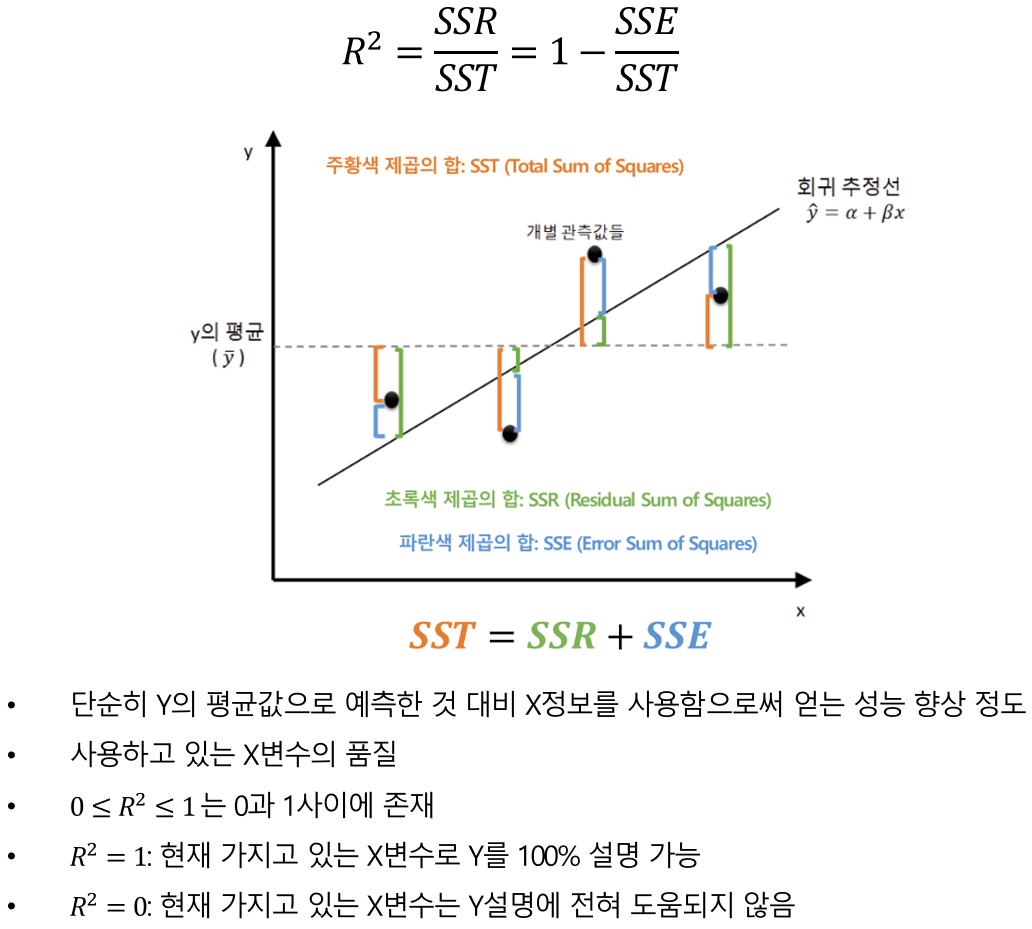

In [44]:
""" 설명 장표 불러오기 """
Image('image/image7.PNG') ### 로컬 사용시
# Image('/content/2023_LG_ES_SSL_1/image/image7.PNG') ### colab 사용시

In [45]:
""" 평가지표 산출(5): R2 Scoe (결정계수) """
print(r2_score(y_test, y_test_pred))

0.6389403215499578


In [46]:
""" 최종 결과 정리 """
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('==========================')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Training MSE: 21.881
Training RMSE: 4.678
Training MAE: 3.315
Training MAPE: 51.174
Training R2: 0.756
Testing MSE: 23.063
Testing RMSE: 4.802
Testing MAE: 3.512
Testing MAPE: 43.946
Testing R2: 0.639


### **Appendix. statsmodels VS sklearn**

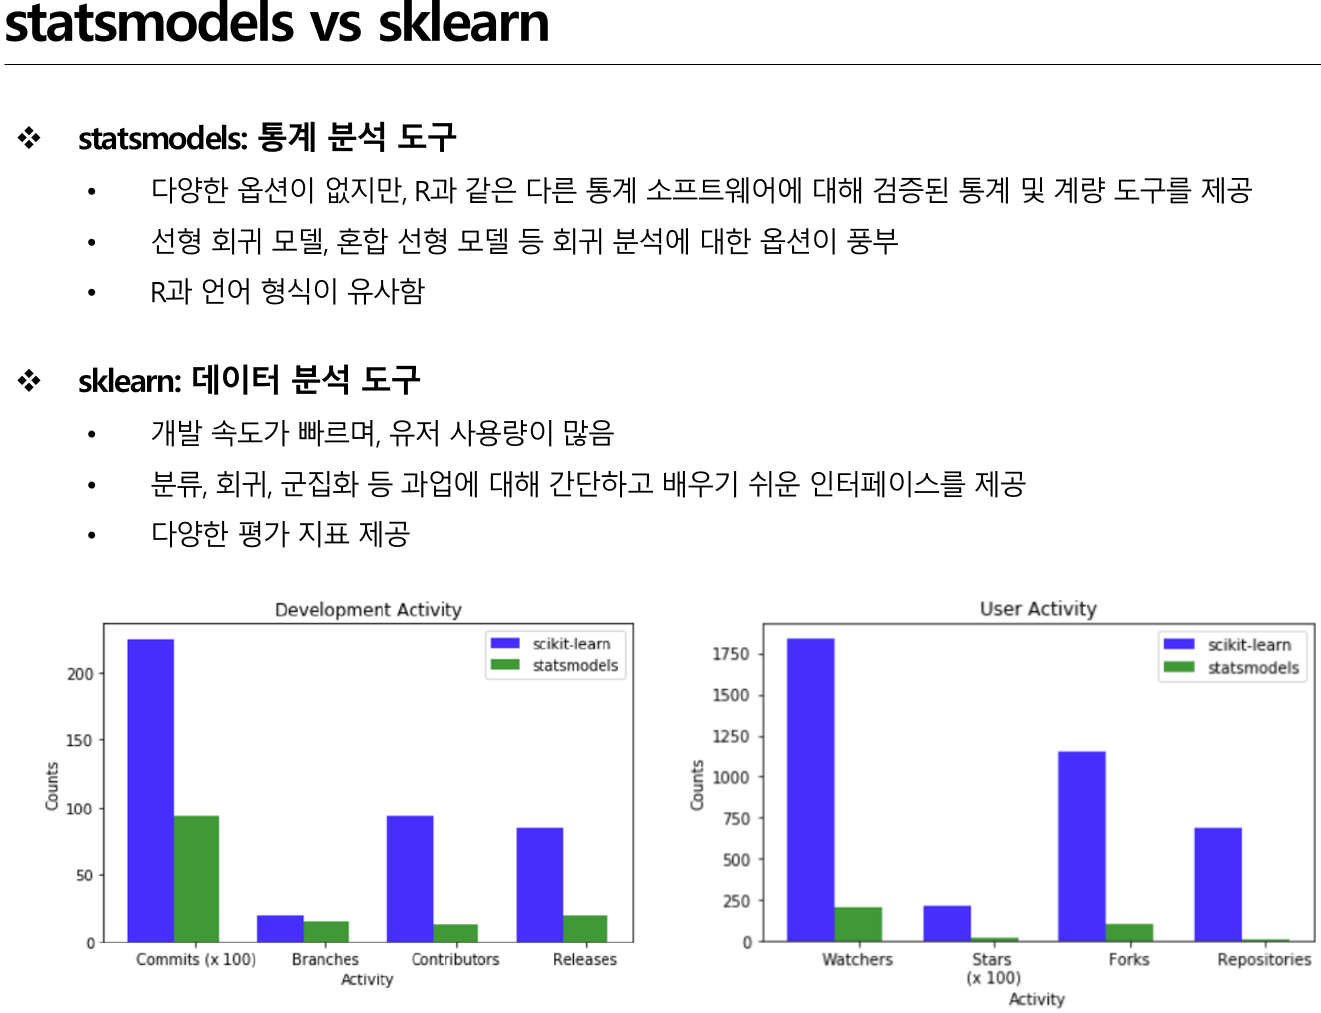

In [47]:
""" 설명 장표 불러오기 """
Image('image/image8.PNG') ### 로컬 사용시
# Image('/content/2023_LG_ES_SSL_1/image/image8.PNG') ### colab 사용시

In [48]:
X_train.shape, X_test.shape

((404, 12), (102, 12))

In [49]:
""" sklearn으로 모델 학습 및 예측 """

"""
fit_intercept=False
 - 기존에 add_constant를 데이터에 해주었기에, intercept를 활용할 필요가 없기 때문
 - default: fit_intercept=True
"""

lr_skl = LinearRegression(fit_intercept=False) 
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)

""" statsmodels로 모델 학습 및 예측 """
lr_stat = sm.OLS(y_train,X_train).fit()
y_pred_stat = lr_stat.predict(X_test)

In [50]:
""" statsmodels 예측 결과"""
test_mse_stat = mean_squared_error(y_test, y_pred_stat)
test_rmse_stat = np.sqrt(mean_squared_error(y_test, y_pred_stat))
test_mae_stat = mean_absolute_error(y_test, y_pred_stat)
test_mape_stat = mean_absolute_percentage_error(y_test, pd.DataFrame(y_pred_stat))
test_r2_stat = r2_score(y_test, y_pred_stat)

print('statsmodels Testing MSE: {:.3f}'.format(test_mse_stat))
print('statsmodels Testing RMSE: {:.3f}'.format(test_rmse_stat))
print('statsmodels Testing MAE: {:.3f}'.format(test_mae_stat))
print('statsmodels Testing MAPE: {:.3f}'.format(test_mape_stat))
print('statsmodels Testing R2: {:.3f}'.format(test_r2_stat))

statsmodels Testing MSE: 23.063
statsmodels Testing RMSE: 4.802
statsmodels Testing MAE: 3.512
statsmodels Testing MAPE: 17.387
statsmodels Testing R2: 0.639


In [51]:
""" sklearn 예측 결과 """
test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_rmse_skl = np.sqrt(mean_squared_error(y_test, y_pred_skl))
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_mape_skl = mean_absolute_percentage_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

print('sklearn Testing MSE: {:.3f}'.format(test_mse_skl))
print('sklearn Testing RMSE: {:.3f}'.format(test_rmse_skl))
print('sklearn Testing MAE: {:.3f}'.format(test_mae_skl))
print('sklearn Testing MAPE: {:.3f}'.format(test_mape_skl))
print('sklearn Testing R2: {:.3f}'.format(test_r2_skl))

sklearn Testing MSE: 23.063
sklearn Testing RMSE: 4.802
sklearn Testing MAE: 3.512
sklearn Testing MAPE: 17.387
sklearn Testing R2: 0.639


# **EOD**